# Preprocessing

Importing needed libraries

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.base import TransformerMixin

Reading csv file

In [4]:
df = pd.read_csv('datasets/Churn.csv', low_memory = False)
df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


Checking dtypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71047 entries, 0 to 71046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 71047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             70831 non-null  float64
 3   MonthlyMinutes             70831 non-null  float64
 4   TotalRecurringCharge       70831 non-null  float64
 5   DirectorAssistedCalls      70831 non-null  float64
 6   OverageMinutes             70831 non-null  float64
 7   RoamingCalls               70831 non-null  float64
 8   PercChangeMinutes          70545 non-null  float64
 9   PercChangeRevenues         70545 non-null  float64
 10  DroppedCalls               71047 non-null  float64
 11  BlockedCalls               71047 non-null  float64
 12  UnansweredCalls            71047 non-null  float64
 13  CustomerCareCalls          71047 non-null  flo

Verifying null values

In [6]:
# grabbing all missing values
total_missing = df.isnull().sum().reset_index().rename(columns = {'index': 'feature', 0: 'missing_count'})

# selecting ones whic have missing_count greater than 0
actual_missing = total_missing[total_missing.missing_count > 0].copy().reset_index(drop = True)

# showing in terms of relative percentages 
actual_missing['missin_count_relavite'] = actual_missing['missing_count'] / len(df)

# adding its dtypes
dtype_dict = df.dtypes.to_dict()
actual_missing['dtype'] = actual_missing.feature.map(dtype_dict)

# missing dataframe
actual_missing

,feature,missing_count,missin_count_relavite,dtype
0,Churn,20000,0.281504,object
1,MonthlyRevenue,216,0.003040,float64
2,MonthlyMinutes,216,0.003040,float64
3,TotalRecurringCharge,216,0.003040,float64
4,DirectorAssistedCalls,216,0.003040,float64
5,OverageMinutes,216,0.003040,float64
6,RoamingCalls,216,0.003040,float64
7,PercChangeMinutes,502,0.007066,float64
8,PercChangeRevenues,502,0.007066,float64
9,ServiceArea,28,0.000394,object


As it can be seen, there are 20000 missing values on the target "Churn", this group is stored in another datadrame for future purposes

In [7]:
# getting those 20000 nan values
df_no_target = df[df.Churn.isnull()].copy().reset_index(drop = True)

# dropping 20000 nan values in the original dataframe
df = df.dropna(subset = 'Churn')

# removing churn feature from actual_missing
actual_missing = actual_missing[actual_missing.feature != 'Churn']

# verifying new shape
df.shape

(51047, 58)

Labeling target

In [23]:
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)

Verifying what kind of imputation will be performed base on their dtypes

In [8]:
# null dataframe
null_columns = actual_missing.feature.tolist()

null_num = df[null_columns].select_dtypes(include = np.number)
null_cat = df[null_columns].select_dtypes(include = ['object', 'category'])

Plotting numeric distributions

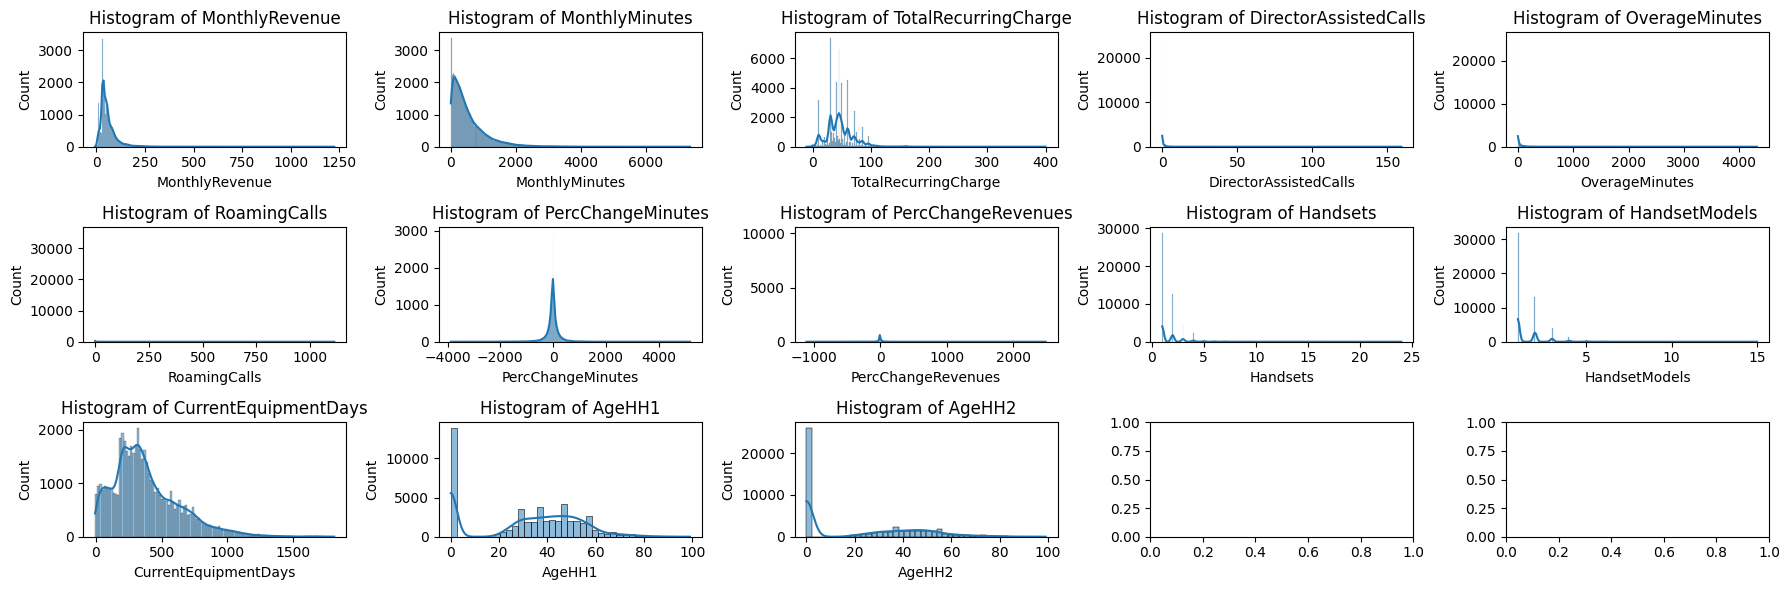

In [15]:
fig, axis = plt.subplots(3, 5, figsize = (18, 6))

for index, column in enumerate(null_num.columns.tolist()):
    # selecting position
    row = index // 5
    col = index % 5
    ax = axis[row][col]
    # plotting
    sns.histplot(df, x = column, kde = True, ax = ax)
    ax.set_title(F'Histogram of {column}')

plt.tight_layout()
plt.show()

In [52]:
null_num.describe()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2
count,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000
mean,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,1.805646,1.558751,380.545841,31.338127,21.144142
std,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,1.331173,0.905932,253.801982,22.094635,23.931368
min,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,1.000000,1.000000,-5.000000,0.000000,0.000000
25%,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,1.000000,1.000000,205.000000,0.000000,0.000000
50%,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,1.000000,1.000000,329.000000,36.000000,0.000000
75%,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,2.000000,2.000000,515.000000,48.000000,42.000000
max,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,24.000000,15.000000,1812.000000,99.000000,99.000000


Deciding strategy for imputing, asymmetric distributions have the median as the imputer whereas symmetric ones have the mean. First of all ,the transformations should be performed on the training test, thus, a 80/20 split is made

In [56]:
# Getting X and y matrices
X = df.drop(columns = ['CustomerID','Churn'])
y = df.Churn

# splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 24)

Creating a class to clean outliers

In [43]:
class CleanOutliers(TransformerMixin):
    def __init__(self, continuous_columns):
        '''
        Treat outliers
        '''
        self.continuous_columns = continuous_columns

    def set_output(self, transform = 'pandas'):
        return self

    def _get_boundaries(self, X_feature):
        q1 = X_feature.quantile(0.25)
        q3 = X_feature.quantile(0.75)
        irs = q3 - q1
        lower_bound = q1 - 1.5 * irs
        upper_bound = q3 + 1.5 * irs
        return lower_bound, upper_bound

    def fit(self, X, y = None):
        self.boundary = {column: self._get_boundaries(X[column]) for column in self.continuous_columns}
        return self

    def transform(self, X, y = None):
        for column in self.continuous_columns:
            lower_bound, upper_bound = self.boundary[column]
            X[column] = X[column].clip(lower = lower_bound,
                                        upper = upper_bound)
        return X

Treating outliers

In [57]:
# getting continuous columns
continuous_columns = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls',
                        'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
                        'CurrentEquipmentDays']

outlier_cleaner = CleanOutliers(continuous_columns)

X_train_tr = outlier_cleaner.fit_transform(X_train)

Plotting numeric distribution on the training set 

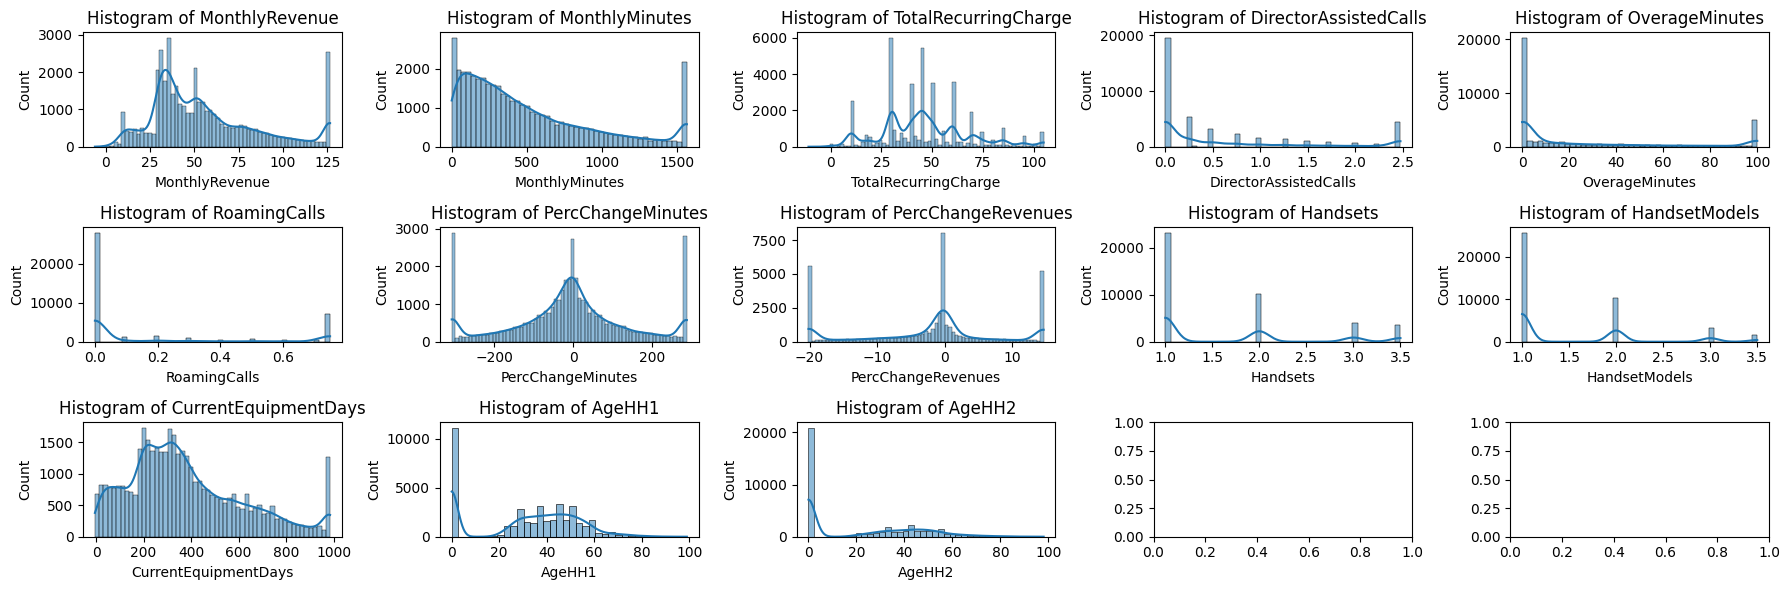

In [50]:
fig, axis = plt.subplots(3, 5, figsize = (18, 6))

for index, column in enumerate(null_num.columns.tolist()):
    # selecting position
    row = index // 5
    col = index % 5
    ax = axis[row][col]
    # plotting
    sns.histplot(X_train_tr, x = column, kde = True, ax = ax)
    ax.set_title(F'Histogram of {column}')

plt.tight_layout()
plt.show()

Boxplot

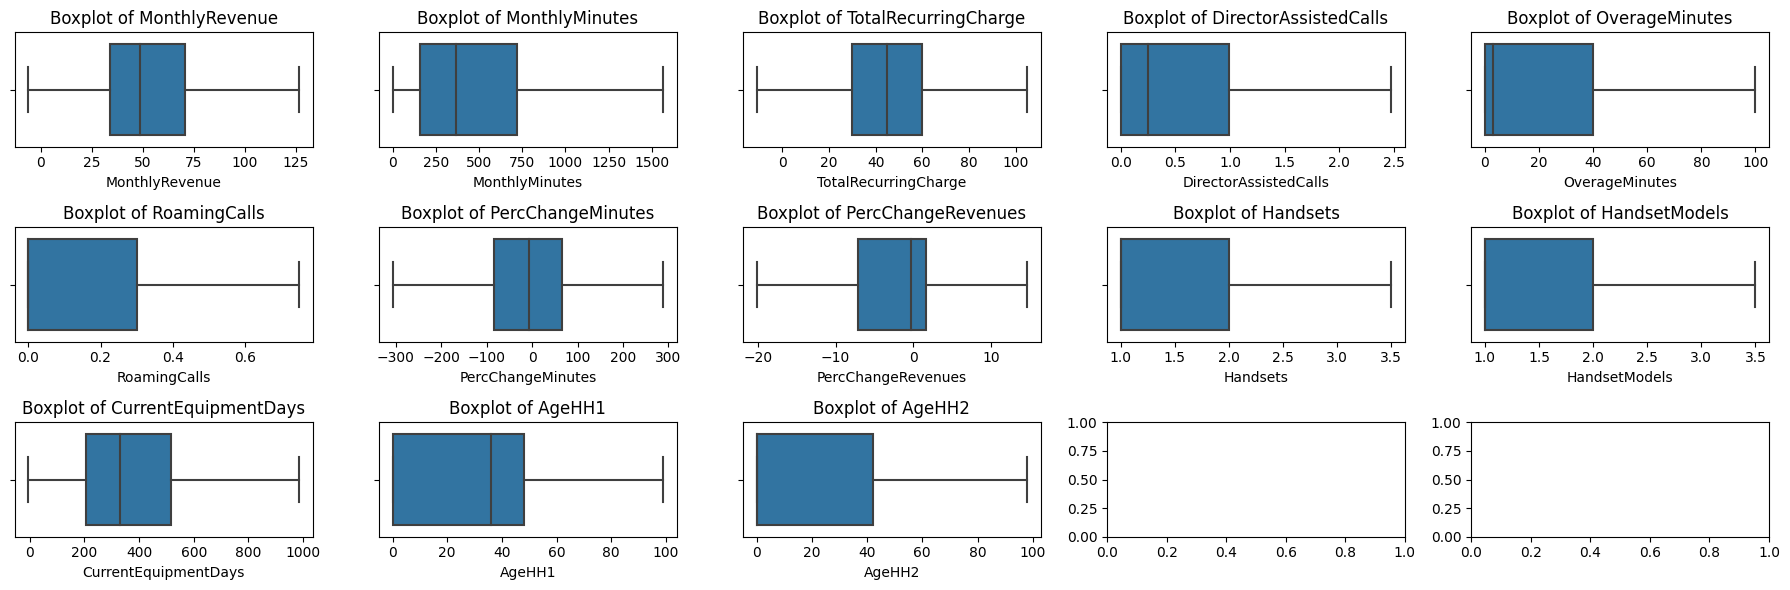

In [53]:
fig, axis = plt.subplots(3, 5, figsize = (18, 6))

for index, column in enumerate(null_num.columns.tolist()):
    # selecting position
    row = index // 5
    col = index % 5
    ax = axis[row][col]
    # plotting
    sns.boxplot(X_train_tr, x = column, ax = ax)
    ax.set_title(F'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [58]:
X_train_tr.describe()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,40712.000000,40712.000000,40712.000000,40712.000000,40712.000000,40712.000000,40553.000000,40553.000000,40837.000000,40837.000000,...,40836.000000,40836.000000,40836.000000,40118.000000,40118.000000,40837.000000,40837.000000,40837.000000,40837.000000,40837.000000
mean,55.289909,495.982474,46.259457,0.590309,24.892808,0.175772,-9.145686,-2.093957,5.999559,4.050937,...,1.804315,1.557057,376.758081,31.311805,21.131014,0.035605,0.017411,0.051816,4.317212,0.056150
std,30.216859,433.566931,21.476571,0.836547,35.652580,0.294334,150.097881,10.273786,9.095970,10.851762,...,1.340274,0.908446,240.015413,22.056203,23.925371,0.201755,0.138438,0.314705,3.136411,0.399954
min,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-307.500000,-20.150000,0.000000,0.000000,...,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.720000,158.000000,30.000000,0.000000,0.000000,0.000000,-84.000000,-7.100000,0.700000,0.000000,...,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.450000,365.000000,45.000000,0.250000,3.000000,0.000000,-6.000000,-0.300000,3.000000,1.000000,...,1.000000,1.000000,330.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,70.890000,721.000000,60.000000,0.990000,40.000000,0.300000,65.000000,1.600000,7.700000,3.700000,...,2.000000,2.000000,517.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,126.645000,1565.500000,105.000000,2.475000,100.000000,0.750000,288.500000,14.650000,221.700000,384.300000,...,24.000000,15.000000,985.000000,99.000000,98.000000,4.000000,3.000000,35.000000,9.000000,25.000000


Selecting median and mean imputers

In [59]:
median_num_col = ['MonthlyRevenue', 'MonthlyMinutes', 'DirectedAssitedCalls', 'OverageMinutes', 'RoamingCalls', 'Handsets',
                    'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2']

mean_num_col = ['TotalRecurringCharge', 'PercChangeMinutes', 'PercChangeRevenues']

Verifying categorical null values

In [62]:
null_cat.value_counts()

ServiceArea
NYCBRO917      1684
HOUHOU281      1510
DALDAL214      1498
NYCMAN917      1182
APCFCH703       783
               ... 
NCRHGP336         1
NCRDNN910         1
SFRFAI707         1
MILLKM920         1
VAHWAY540         1
Name: count, Length: 747, dtype: int64

In [68]:
df.describe(include = object).T

,count,unique,top,freq
ServiceArea,51023,747,NYCBRO917,1684
ChildrenInHH,51047,2,No,38679
HandsetRefurbished,51047,2,No,43956
HandsetWebCapable,51047,2,Yes,46046
TruckOwner,51047,2,No,41524
RVOwner,51047,2,No,46894
Homeownership,51047,2,Known,33987
BuysViaMailOrder,51047,2,No,32596
RespondsToMailOffers,51047,2,No,31821
OptOutMailings,51047,2,No,50295


Creating a class to replace

0         0.0
1        42.0
2        26.0
3         0.0
4        54.0
         ... 
71042    64.0
71043    26.0
71044     0.0
71045    48.0
71046    54.0
Name: AgeHH2, Length: 71047, dtype: float64